### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
data = pd.read_csv('Sales_Data.csv')

In [ ]:
data.head(20)

### Data Formatting and preprocessing

In [3]:
# Creating a new df
df_cols = ['Date', 'Customer_Name' , 'Item_Name', 'Vrh_No', 'Quantity', 'Price_per_unit', 'Amount']
df = pd.DataFrame(columns=df_cols)

In [4]:
# date column
df['Date'] = data['Date']

In [5]:
# Dropping last 3 rows
data.drop(index=data.index[-3:],axis=0,inplace=True)
#data

In [6]:
# Obtaining row index where name column contains customer name
customer_ind = data[data['Name'].str.contains(r'customer')].index
customer_ind = list(customer_ind)

In [7]:
# Obtaining customer name values
customer_val = data['Name'][data['Name'].str.contains(r'customer')].values
customer_val = list(customer_val)

In [8]:
# Creating a dictionary of customer name index and customer name value
customer = dict(map(lambda i,j : (i,j) , customer_ind,customer_val))

In [9]:
# customer_name column with customer name values
for x, y in customer.items():
    df.at[x,'Customer_Name'] = y

In [ ]:
df

In [10]:
# Obtaining row index where name column contains item name
item_ind = data[data['Name'].str.contains(r'Item')].index
item_ind = list(item_ind)

In [11]:
# Obtaining item name values
item_val = data['Name'][data['Name'].str.contains(r'Item')].values
item_val = list(item_val)

In [12]:
len(item_ind)

1957

In [13]:
len(item_val)

1957

In [14]:
# Creating a dictionary of item name index and item name value
item = dict(map(lambda i,j : (i,j) , item_ind,item_val))

In [15]:
# item_name column with item name values
for x, y in item.items():
    df.at[x,'Item_Name']=y

In [ ]:
df

In [16]:
# Obtaining vch no for each customer
vch_no=[]
for i in customer_ind:
    vch_no.append(data.iloc[i]['Vch No.'])

In [17]:
# Creating a dictionary of customer name index and vch no value
vch = dict(map(lambda i,j : (i,j) ,customer_ind,vch_no))

In [18]:
# Vrh_No column with vrh no. values
for x, y in vch.items():
    df.at[x,'Vrh_No']=y

In [19]:
# Filling nan values
df['Vrh_No'] = df['Vrh_No'].ffill(axis = 0)

In [ ]:
df.head(30)

In [20]:
df['Quantity'] = data['Vch Type'].apply(lambda x: x.split(' ')[0])
df['Price_per_unit'] = data['Vch No.'].apply(lambda x: x.split('/')[0])

In [21]:
df['Quantity'] = pd.to_numeric(df['Quantity'],errors='coerce')
df['Price_per_unit'] = pd.to_numeric(df['Price_per_unit'],errors='coerce')

In [22]:
df['Amount'] = df['Quantity'] * df['Price_per_unit']

In [ ]:
df

## EDA

In [23]:
print('No of records in data: ',df.shape[0])
print('No of columns in data: ',df.shape[1])

No of records in data:  2720
No of columns in data:  7


In [ ]:
# Viewing first 10 rows of the data
df.head(10)

In [ ]:
# Viewing last 10 rows of the data
df.tail(10)

In [ ]:
# Viewing random 10 rows of the data
df.sample(10)

In [24]:
# Viewing the list of all the columns in this dataset
df.columns

Index(['Date', 'Customer_Name', 'Item_Name', 'Vrh_No', 'Quantity',
       'Price_per_unit', 'Amount'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         760 non-null    object 
 1   Particulars  760 non-null    object 
 2   Name         2717 non-null   object 
 3   Vch Type     2717 non-null   object 
 4   Vch No.      2717 non-null   object 
 5   Debit        1957 non-null   float64
 6   Credit       760 non-null    float64
dtypes: float64(2), object(5)
memory usage: 148.7+ KB


In [26]:
df.isnull().sum()

Date              1959
Customer_Name     1960
Item_Name          763
Vrh_No               0
Quantity           763
Price_per_unit       3
Amount             763
dtype: int64

In [27]:
# Filling nan values in date column
df['Date'] = data['Date'].ffill(axis = 0)
df['Customer_Name'] = df['Customer_Name'].ffill(axis = 0)
df['Vrh_No'] = df['Vrh_No'].ffill(axis = 0)

In [28]:
df.isnull().sum()

Date                3
Customer_Name       0
Item_Name         763
Vrh_No              0
Quantity          763
Price_per_unit      3
Amount            763
dtype: int64

In [29]:
df.dropna(inplace=True)

In [ ]:
df.to_csv('Final_Data.csv',index=False)

In [30]:
df.dtypes

Date               object
Customer_Name      object
Item_Name          object
Vrh_No             object
Quantity          float64
Price_per_unit    float64
Amount            float64
dtype: object

In [31]:
# Converting columns datatype to appropriate datatypes
df['Vrh_No'] = df['Vrh_No'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
# Mathematical look of the data
df.describe()

,Vrh_No,Quantity,Price_per_unit,Amount
count,1957.000000,1957.000000,1957.000000,1957.000000
mean,207.389371,276.928820,37.587874,6881.535919
std,111.589664,555.806432,44.449410,12124.901107
min,1.000000,0.500000,3.500000,3.500000
25%,119.000000,20.000000,20.000000,800.000000
50%,218.000000,70.000000,25.000000,2250.000000
75%,293.000000,240.000000,49.000000,6880.000000
max,436.000000,4800.000000,1250.000000,89400.000000


In [33]:
df.describe(include='object').T

,count,unique,top,freq
Customer_Name,1957,141,customer2,239
Item_Name,1957,77,Item_3,366


In [35]:
df['Customer_Name'].nunique()

141

In [36]:
df['Item_Name'].nunique()

77

In [37]:
print('Starting Date: ',df['Date'].min())
print('Ending Date: ',df['Date'].max())

Starting Date:  2019-01-04 00:00:00
Ending Date:  2021-12-01 00:00:00


In [38]:
print('Minimum quantity: ',df['Quantity'].min())
print('Maximum quantity: ',df['Quantity'].max())

Minimum quantity:  0.5
Maximum quantity:  4800.0


In [ ]:
df.loc[df['Quantity'] == 0.5]

In [ ]:
df.loc[df['Quantity'] == 4800]

In [39]:
print('Minimum price per unit: ',df['Price_per_unit'].min())
print('Maximum price per unit: ',df['Price_per_unit'].max())

Minimum price per unit:  3.5
Maximum price per unit:  1250.0


In [40]:
print('Minimum Amount: ',df['Amount'].min())
print('Maximum Amount: ',df['Amount'].max())

Minimum Amount:  3.5
Maximum Amount:  89400.0


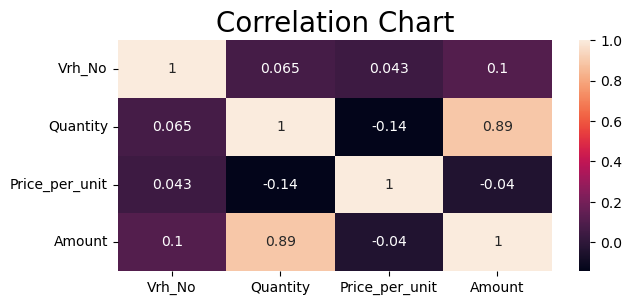

In [41]:
plt.figure(figsize=(7,3))
plt.title('Correlation Chart',fontsize=20)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [42]:
df['Year'] = df['Date'].dt.year

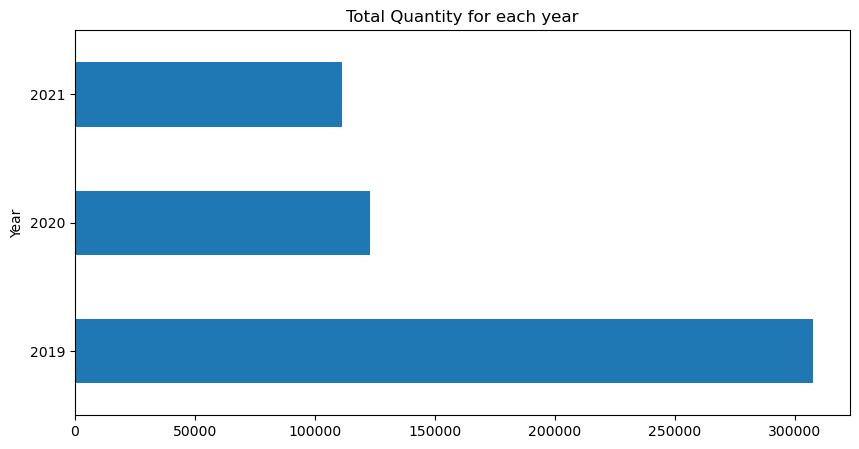

In [43]:
df.groupby('Year')['Quantity'].sum().plot(kind='barh',figsize=(10,5),title='Total Quantity for each year')
plt.show()

**Total quantity is highest for the year 2019**

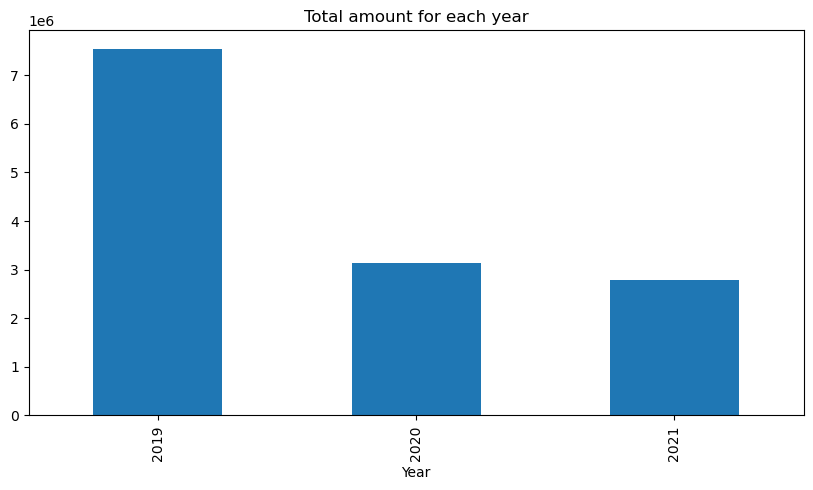

In [44]:
df.groupby('Year')['Amount'].sum().plot(kind='bar',figsize=(10,5),title='Total amount for each year')
plt.show()

**Total amount is highest for the year 2019**

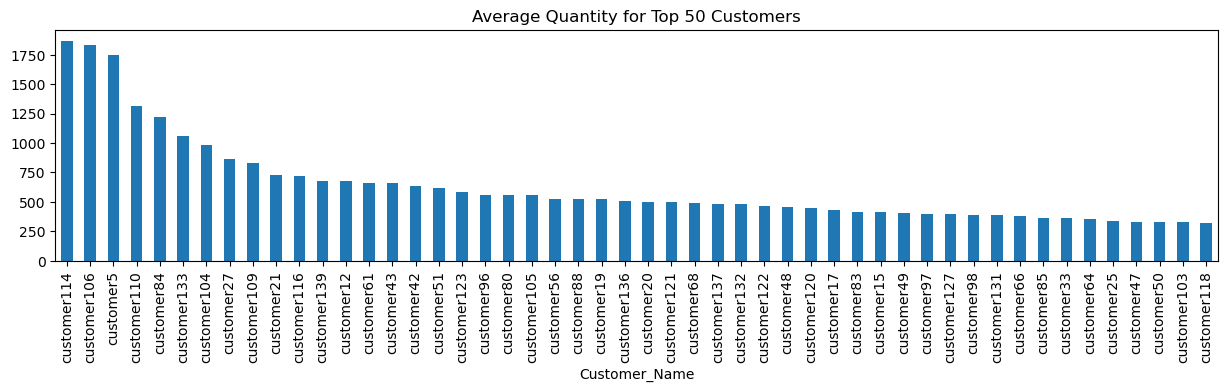

In [45]:
(df.groupby('Customer_Name')['Quantity'].mean().sort_values(ascending=False)).head(50).plot(kind='bar',figsize=(15,3))
plt.title('Average Quantity for Top 50 Customers')
plt.show()

**Average quantity is highest for customer114**

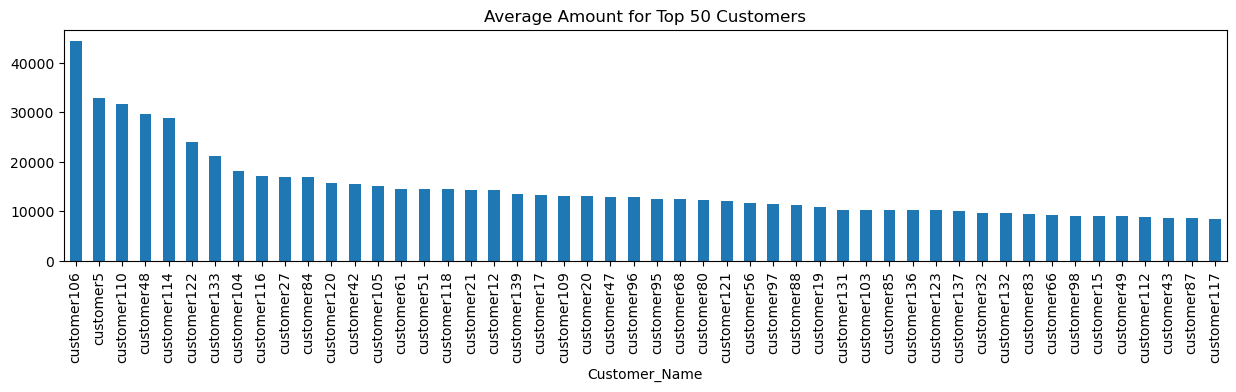

In [46]:
(df.groupby('Customer_Name')['Amount'].mean().sort_values(ascending=False)).head(50).plot(kind='bar',figsize=(15,3))
plt.title('Average Amount for Top 50 Customers')
plt.show()

**Average amount is highest for customer106**

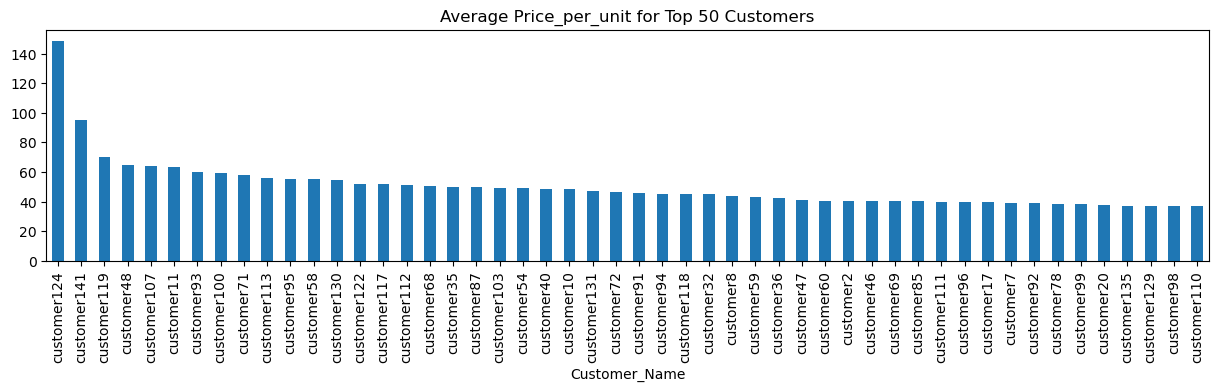

In [47]:
(df.groupby('Customer_Name')['Price_per_unit'].mean().sort_values(ascending=False)).head(50).plot(kind='bar',figsize=(15,3))
plt.title('Average Price_per_unit for Top 50 Customers')
plt.show()

**Average price_per_unit is highest for customer124**

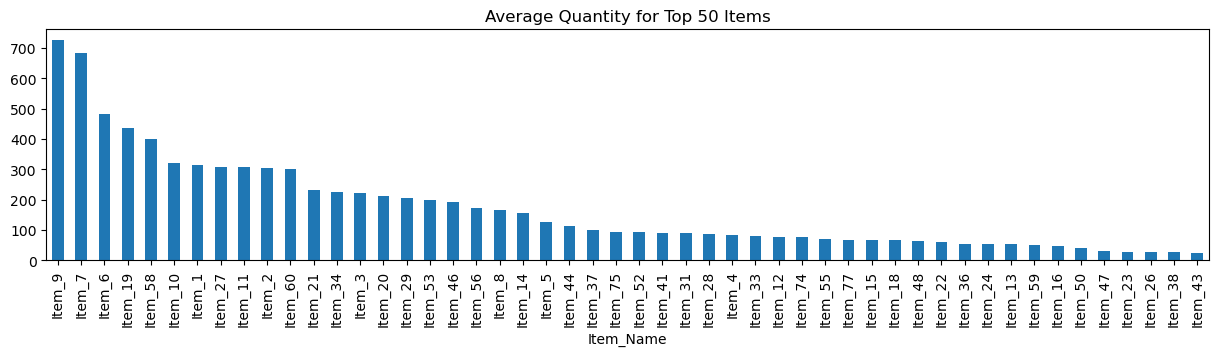

In [48]:
(df.groupby('Item_Name')['Quantity'].mean().sort_values(ascending=False)).head(50).plot(kind='bar',figsize=(15,3))
plt.title('Average Quantity for Top 50 Items')
plt.show()

**Average quantity is highest for Item9**

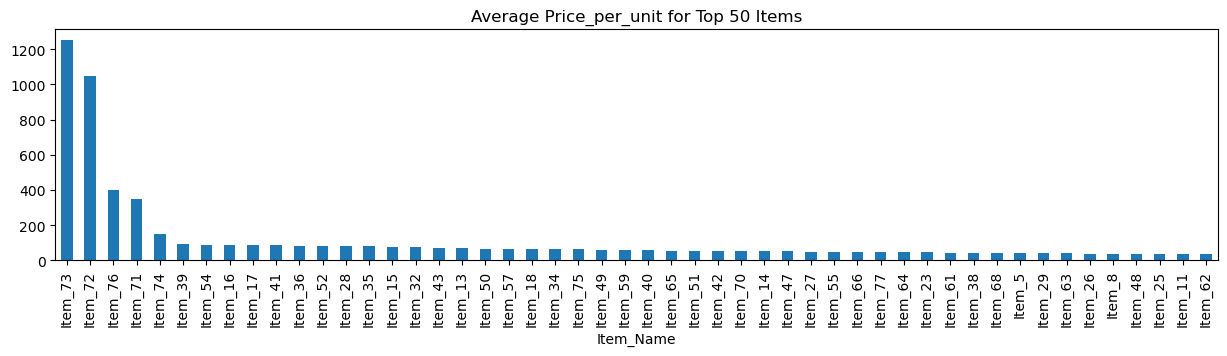

In [49]:
(df.groupby('Item_Name')['Price_per_unit'].mean().sort_values(ascending=False)).head(50).plot(kind='bar',figsize=(15,3))
plt.title('Average Price_per_unit for Top 50 Items')
plt.show()

**Average price_per_item is highest for Item73**

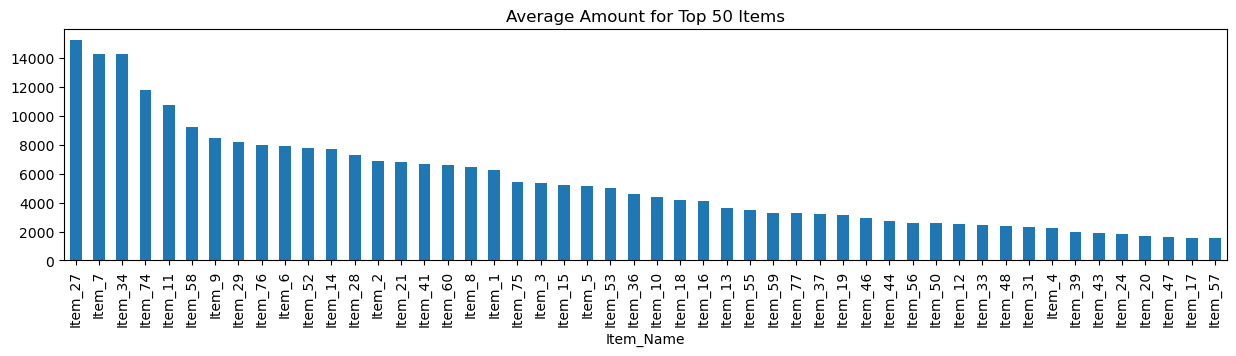

In [50]:
(df.groupby('Item_Name')['Amount'].mean().sort_values(ascending=False)).head(50).plot(kind='bar',figsize=(15,3))
plt.title('Average Amount for Top 50 Items')
plt.show()

**Average amount is highest for Item27**

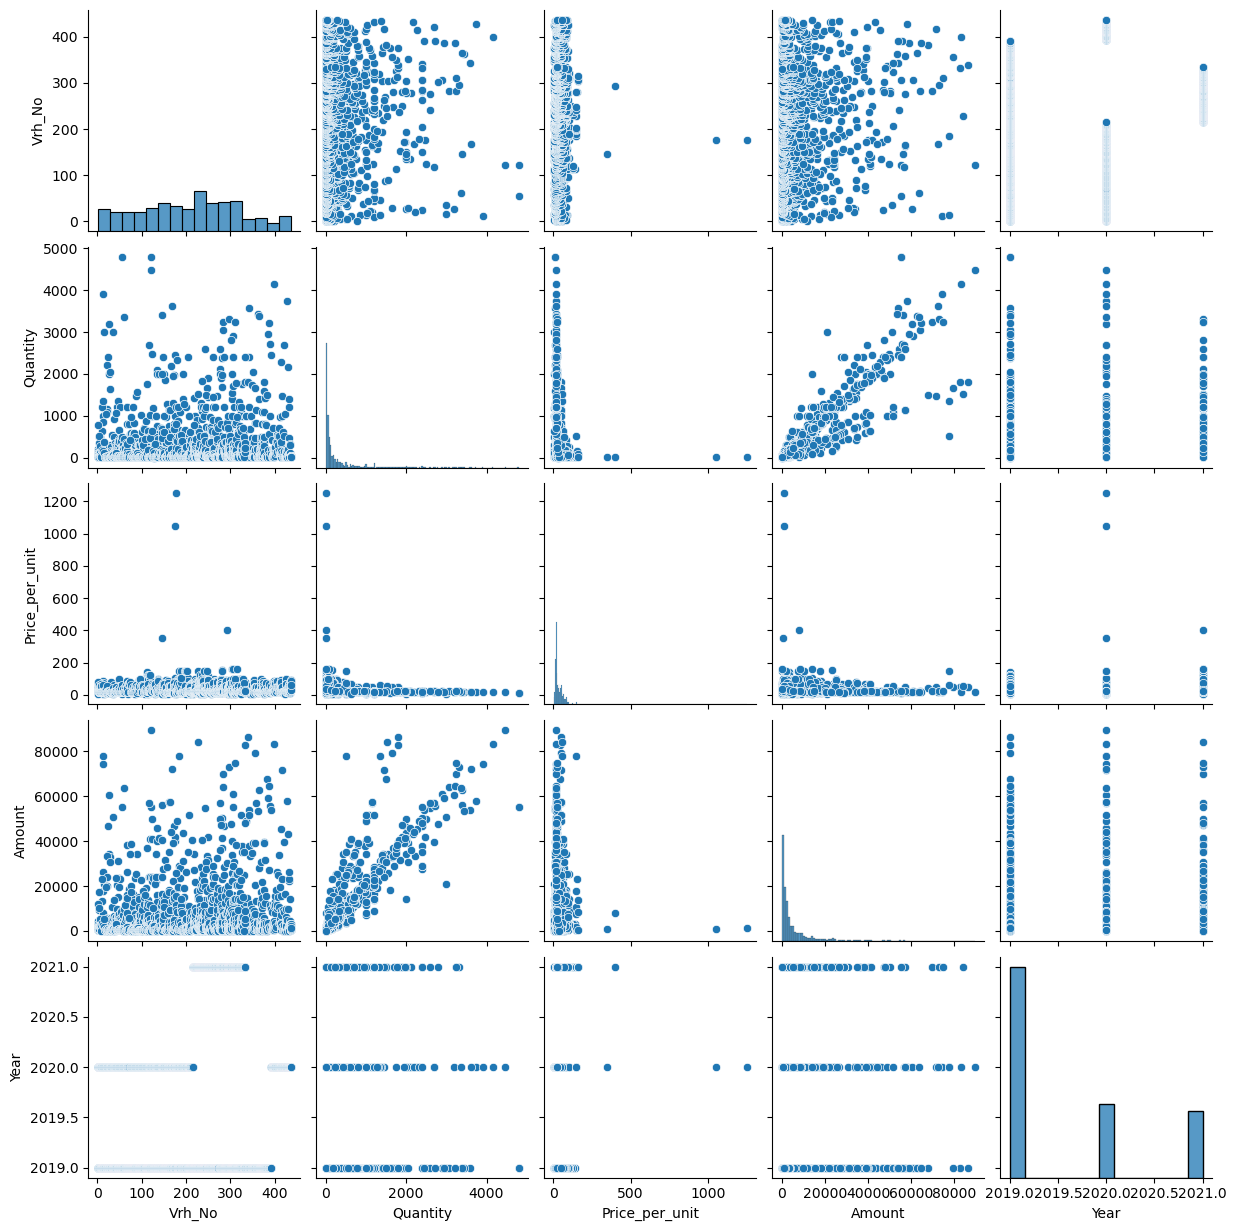

In [51]:
sns.pairplot(df)
plt.show()

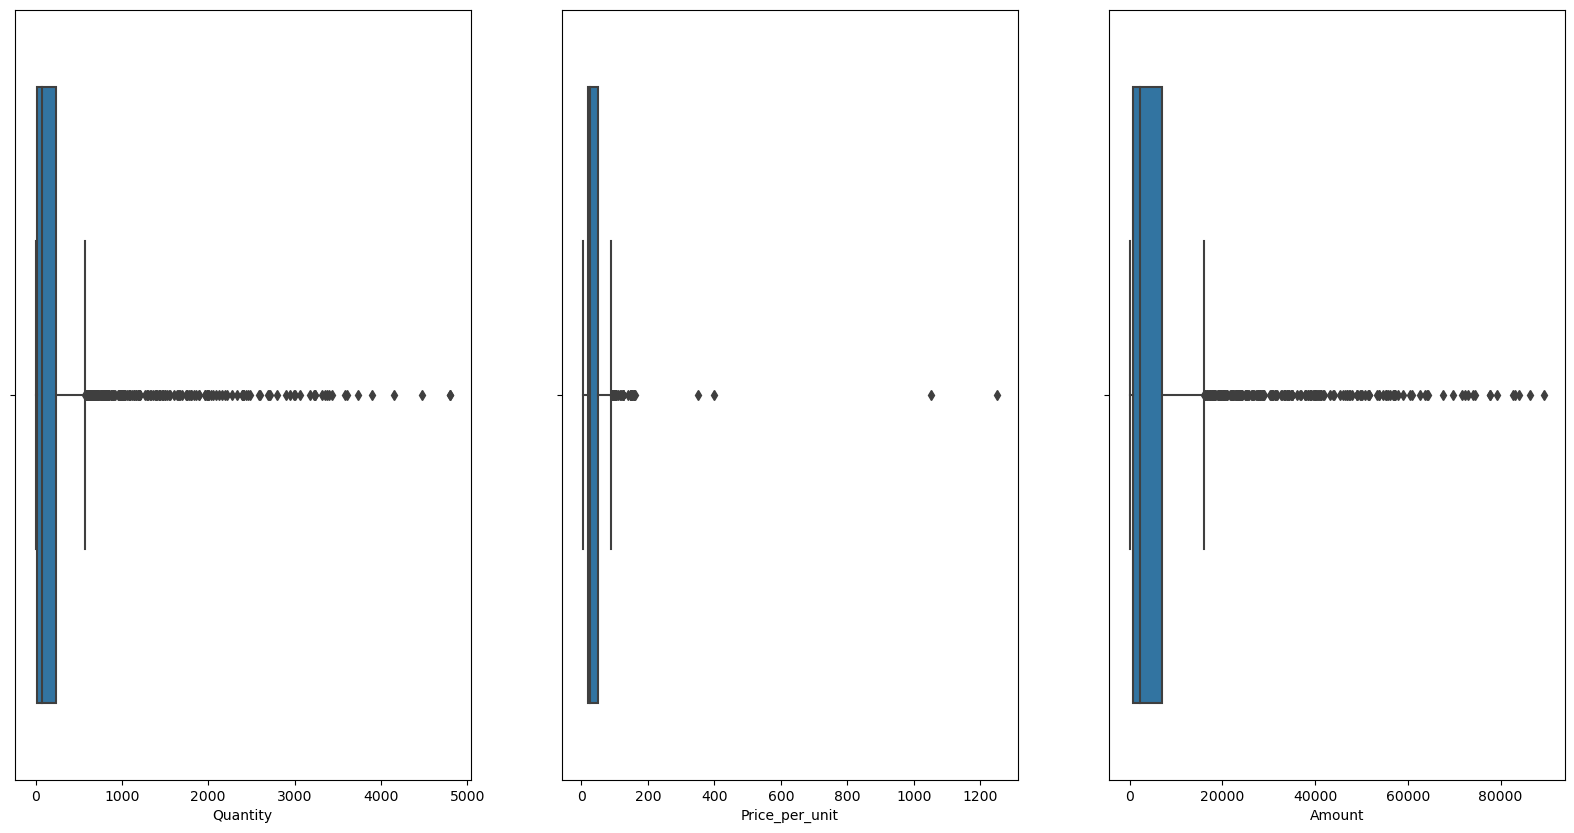

In [52]:
fig, axes = plt.subplots(1,3, figsize=(20,10))
sns.boxplot(ax=axes[0],data=df,x='Quantity')
sns.boxplot(ax=axes[1],data=df,x='Price_per_unit')
sns.boxplot(ax=axes[2],data=df,x='Amount')
plt.show()

**Item3 has the highest sale and item54 has the lowest sale**

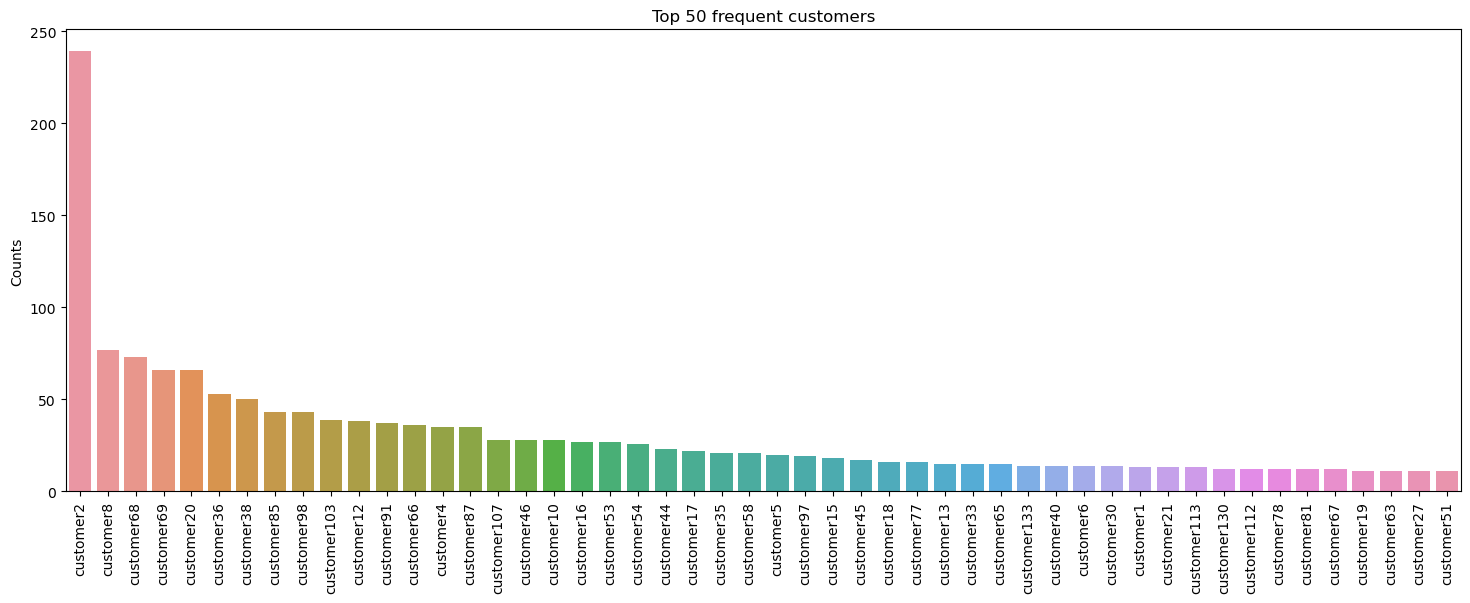

In [53]:
customer_name=df['Customer_Name'].value_counts().sort_values(ascending=False).iloc[0:50]
plt.figure(figsize=(18,6))
sns.barplot(customer_name.index, customer_name.values)
plt.ylabel("Counts")
plt.title('Top 50 frequent customers');
plt.xticks(rotation=90);

**Customer2 is the most frequent customer**

In [54]:
data1= df.groupby('Date')['Amount'].mean().reset_index().copy()
data2= df.groupby('Date')['Price_per_unit'].mean().reset_index().copy()
data3= df.groupby('Date')['Quantity'].mean().reset_index().copy()

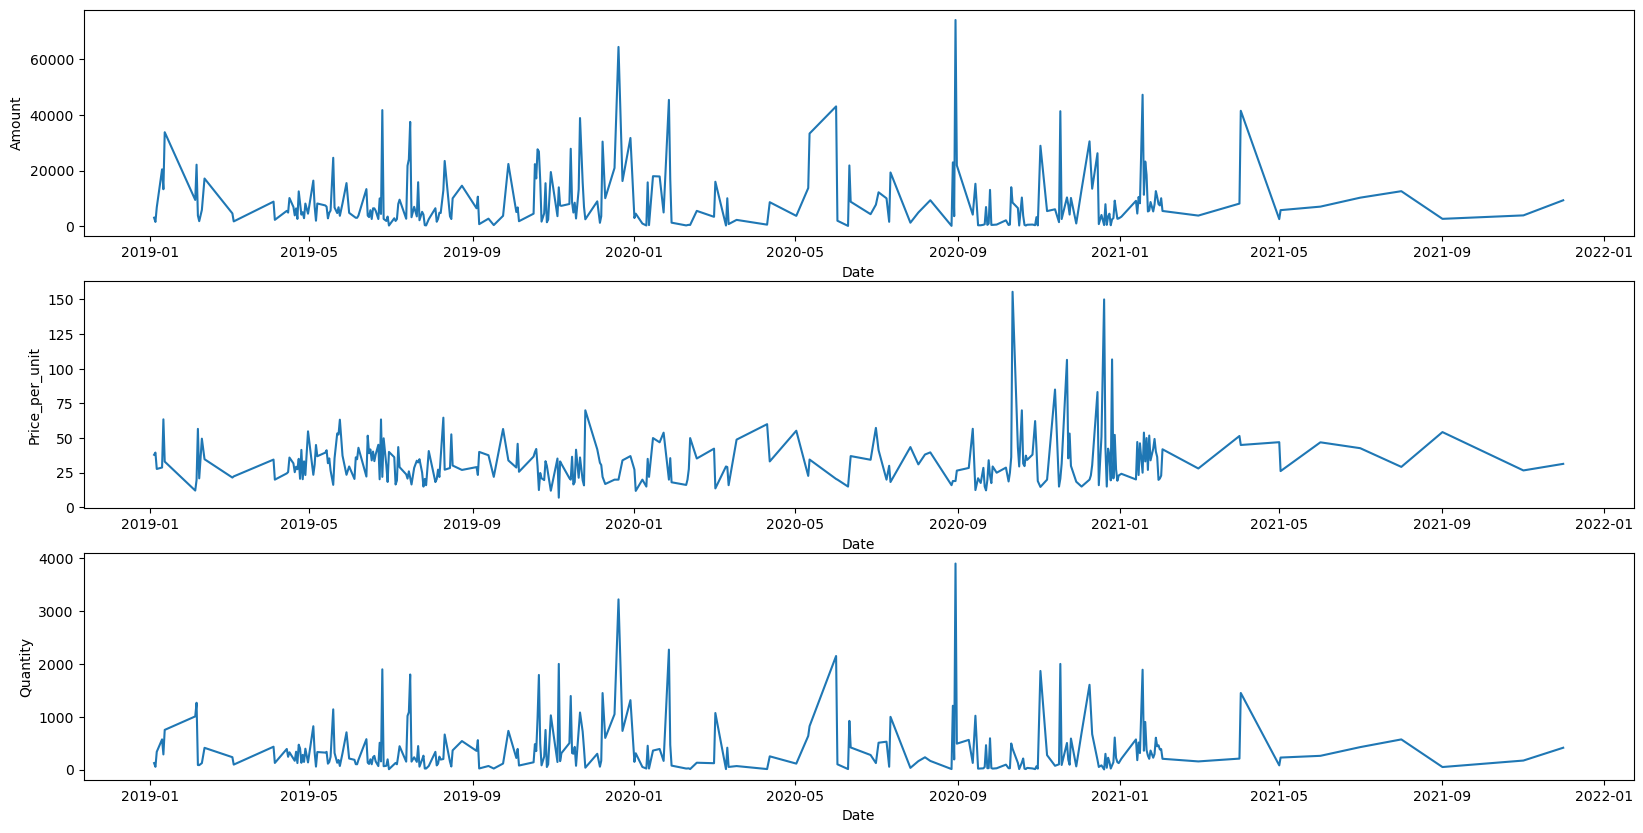

In [55]:
f, ax = plt.subplots(3,1,figsize=(20, 10))
sns.lineplot(x=data1["Date"], y=data1['Amount'],ax=ax[0])
sns.lineplot(x=data2["Date"], y=data2['Price_per_unit'],ax=ax[1])
sns.lineplot(x=data3["Date"], y=data3['Quantity'],ax=ax[2])
plt.show()

**During the periods from September 2019 to January 2020 and September 2020 to January 2021, significant fluctuations were observed in both price and quantity. The quantity ranged between 0 and 3900 units, while the price ranged from 0 to 150. The revenue generated during these periods varied from 0 to 80,000.**

**Notably, the highest revenue was earned on a specific date in September 2020, which coincided with the highest quantity of items sold.**

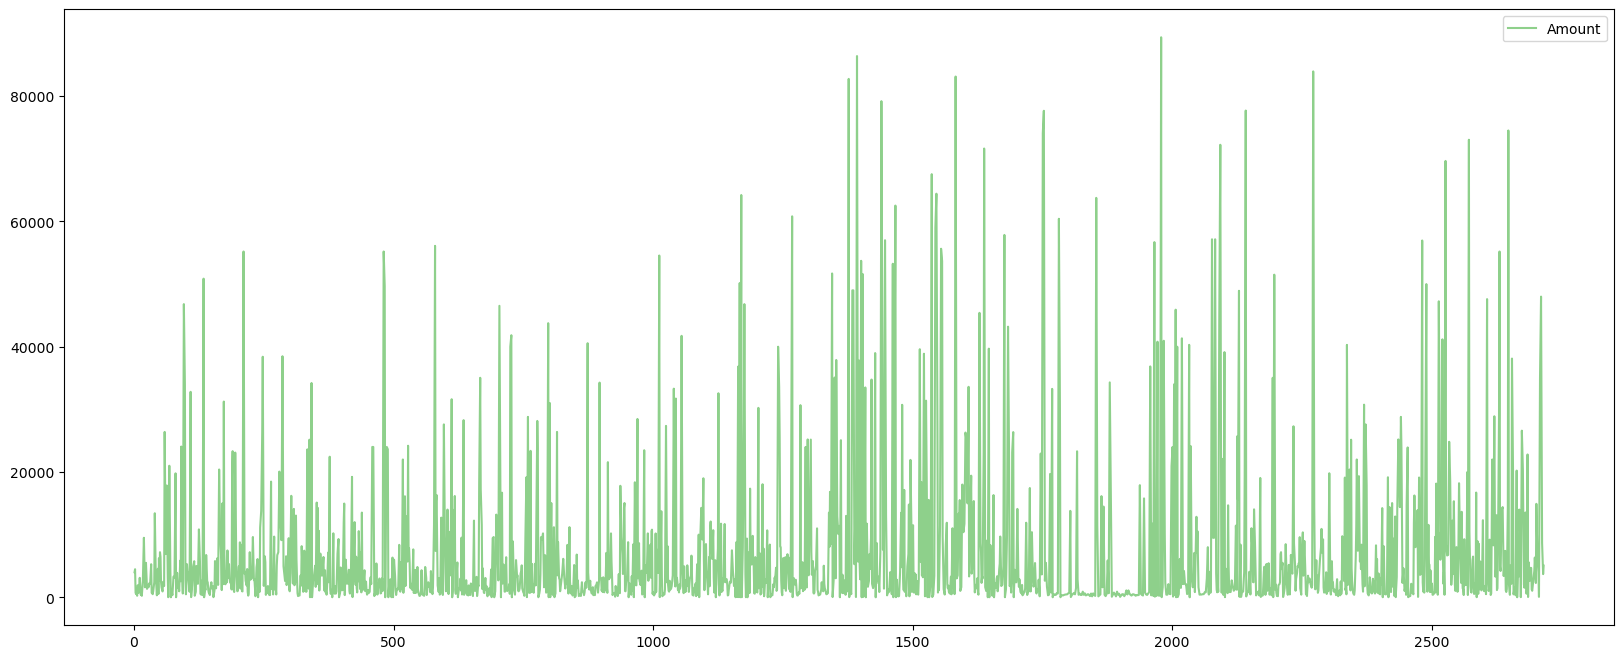

In [56]:
GREEN_COLORMAP = sns.color_palette("Greens")
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
df.plot(y='Amount', ax=ax, color=GREEN_COLORMAP[2])
plt.show()

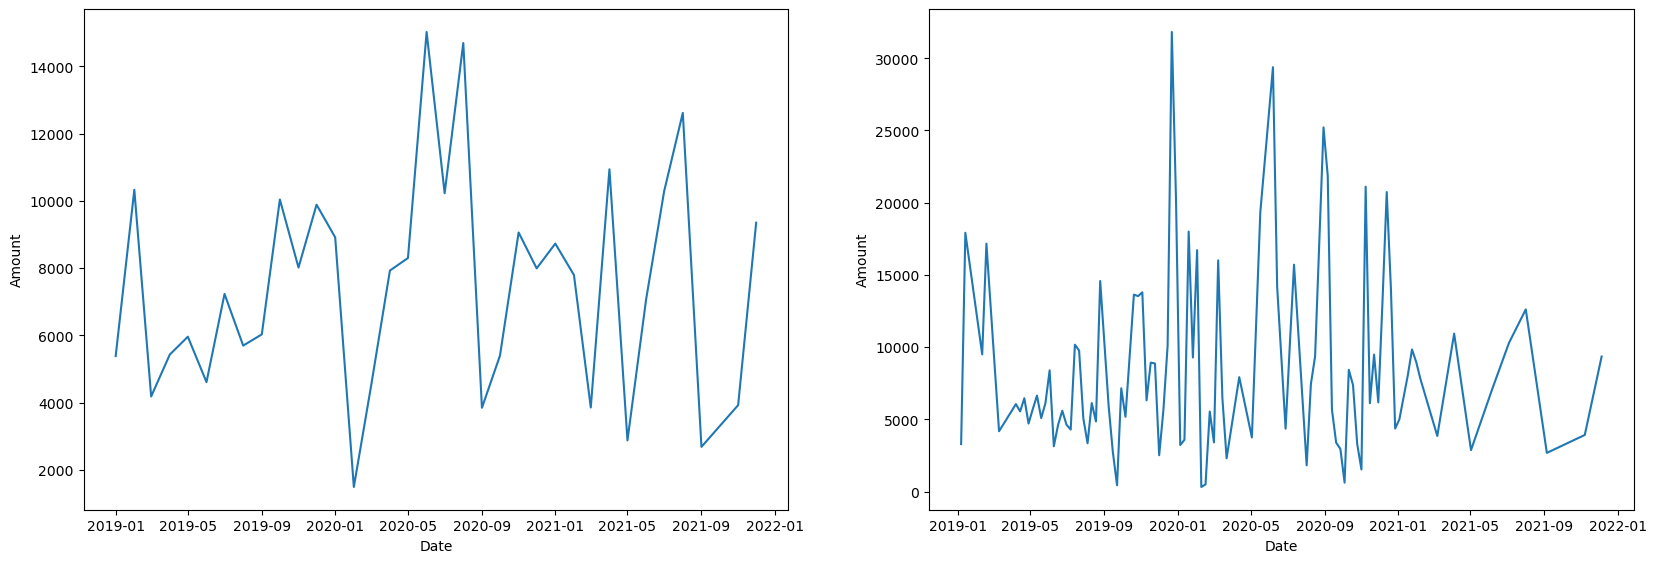

In [57]:
df.set_index('Date', inplace=True) 
Data1 = df['Amount'].resample('MS').mean() # M stands for month Start.
Data2 = df['Amount'].resample('W').mean() 
f, ax = plt.subplots(1,2,figsize=(20, 6.5))
sns.lineplot(x = Data1.index, y = Data1,ax=ax[0])
sns.lineplot(x = Data2.index, y = Data2,ax=ax[1])
plt.show()

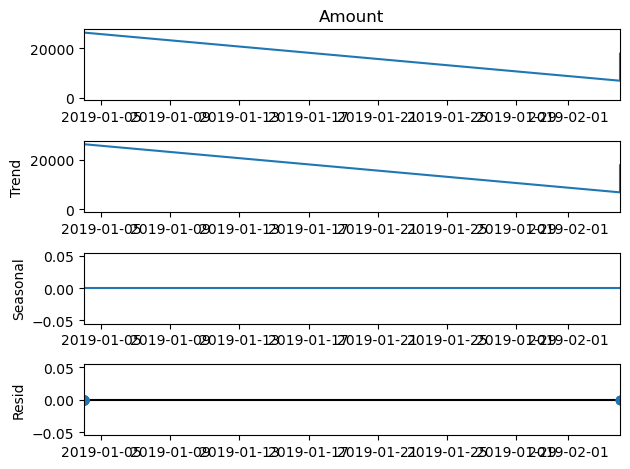

In [58]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

decomposition1 = sm.tsa.seasonal_decompose(df['Amount'][:50], model='additive',period=1)
decomposition1.plot()
plt.show()

**There is constant seasonality and residual as shown by graph and little upward movement in trend and moving average**

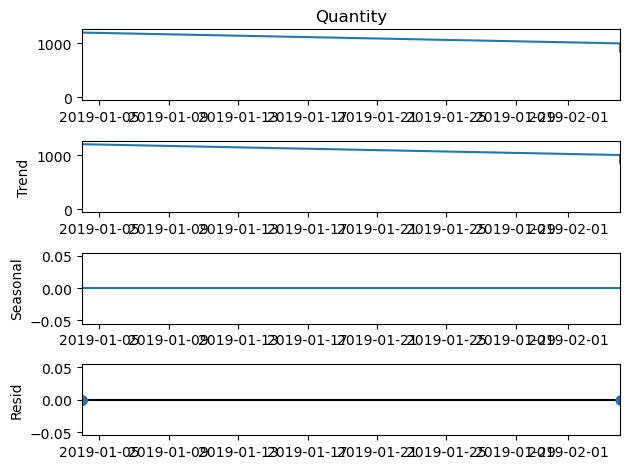

In [59]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

decomposition1 = sm.tsa.seasonal_decompose(df['Quantity'][:50], model='additive',period=1)
decomposition1.plot()
plt.show()

**There is constant seasonality and residual as shown by graph and little downward movement in trend and moving average**

# EDA REPORTS

### Pandas-Profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)
profile.to_file("output.html")

In [ ]:
from IPython.display import HTML
HTML(filename='output.html')

### Sweetviz

In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html()

### Autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

In [ ]:
dr = AV.AutoViz('Final_Data.csv')

## D-Tale

In [ ]:
import dtale
dtale.show(df, ignore_duplicate=True)